# TAREA 1 BIOINFORMÁTICA

## Cristina Masiá Gorriz, U2

En primer lugar, vamos a instalar la base de datos *SwissProt* de BLAST empleando el *script* `preparar_ambiente.sh`.

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## Introducción

La **cognición humana** está relacionada con el sistema nervioso central (SNC) y con su organización sináptica. Es por ello por lo que la sinapsis es fundamental para la **comunicación neuronal**.

Al principio se creía que los Cnidarios fueron los primeros organismos en desarrollar un sistema nervioso con redes nerviosas difusas. Esto daba a entender que el origen de los Cnidarios y los Ctenóforos era independiente. Sin embargo, se ha planteado la idea de que la comunicación sináptica es anterior a la aparición de estos dos filos de *Radiata* y, después, se perdió. 

Según Viscardi *et al.* (2021), entender la evolución de esta red de genes de neurotransmisión humana podría permitir que comprendiéramos el establecimiento de la propia sinapsis.

El objetivo de los investigadores ha sido recrear el establecimiento de la **red de genes de neurotransmisión humana**. Sus análisis se han basado en elegir genes humanos que participan en los procesos de neurotransmisión humana. Para ello han identificado 325 genes que participan en varias vías de neurotransmisión como la colinérgica.

Tras varios análisis mediante bases de datos como KEGG o NCBI  y trabajando con receptores nicotínicos neuroexclusivos (CHRN) y con receptores metabotrópicos de acetilcolina (familia CHRM) se ha determinado que los Ctenóforos muestran redes nerviosas difusas, al igual que los Cnidarios.

Para comprobar el hecho de que los animales compartimos un ancestro común, vamos a trabajar con tres proteínas humanas que participan en los neuroreceptores de acetilcolina, una de **receptores muscarínicos** (CHRM1) y dos de **receptores nicotínicos** (CHRNA3 y CHRNA7).

## Resultados

Una vez tenemos instada la base de datos vamos a trabajar con las tres proteínas que participan en los neuroreceptores de acetilcolina.

### BLASTP individual

Para el BLAST individual, empezaremos con la proteína **CHRM1**. Para analizar esta proteína ejecutaremos una búsqueda de **blastp** ya que este programa nos permite comparar nuestras secuencias con la base de datos *SwissProt*. Para la búsqueda usaremos un umbral de valor de *E* de $10^{-120}$ que es muy exigente.

In [2]:
BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-120',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

**NOTA**: a veces al ejecutar este comando da error. Simplemente hay que volver a ejecutar el `preparar_ambiente.sh`y ejecutar de nuevo este comando y ya no da problemas.

Para poder observar los datos del comando anterior vamos a transformar el "BlastpOut01" en una tabla.

In [3]:
TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

Con la tabla creada vamos a hacer dos cosas. Por un lado, vamos a conocer las dimensiones de la tabla. Por otro lado, vamos a visualizar dicha tabla.

In [4]:
dim(TablaOut01)

[1] 15 11

La tabla que corresponde con la proteína **CHRM1** tiene 15 filas y 11 columnas y se puede ver a continuación.

In [5]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
P17200.1,48.214,448,24,437,41,483,1.12e-141,9031,Gallus gallus,birds
P32211.1,48.198,444,24,437,30,472,1.56e-138,10090,Mus musculus,rodents
P10980.2,47.153,439,23,437,21,459,9.08e-138,10116,Rattus norvegicus,rodents


Ahora repetimos los mismos pasos para la proteína **CHRNA3**. Para el **blastp** usaremos un valor *E* de $10^{-170}$.

In [6]:
BlastpOut03 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA3.fas',
                              '-evalue', '1.0e-170',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

TablaOut03 <- read.table(textConnection(BlastpOut03),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

Calculamos las dimensiones de la tabla y la visualizamos.

In [7]:
dim(TablaOut03)

[1] 16 11

La tabla tiene 13 filas y 11 columnas y se puede ver a continuación.

In [8]:
TablaOut03

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P32297.4,100.000,505,1,505,1,505,0,9606,Homo sapiens,primates
Q07263.1,95.825,479,27,505,17,495,0,9913,Bos taurus,even-toed ungulates
Q8R4G9.1,92.886,492,14,505,8,499,0,10090,Mus musculus,rodents
P04757.1,92.308,494,12,505,6,499,0,10116,Rattus norvegicus,rodents
P09481.2,85.232,474,31,504,22,495,0,9031,Gallus gallus,birds
P18845.1,68.885,511,13,501,3,509,0,7957,Carassius auratus,bony fishes
P49581.1,65.145,482,20,501,19,492,0,9031,Gallus gallus,birds
Q15825.1,67.653,473,34,501,33,489,0,9606,Homo sapiens,primates
Q5IS76.1,67.442,473,34,501,33,489,0,9598,Pan troglodytes,primates


De nuevo, repetimos los mismos pasos para la proteína **CHRNA7**. Para el **blastp** usaremos un valor *E* de $10^{-110}$.

In [9]:
BlastpOut07 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRNA7.fas',
                              '-evalue', '1.0e-110',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

TablaOut07 <- read.table(textConnection(BlastpOut07),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))

Volvemos a calcular las dimensiones de la tabla y a visualizarla.

In [10]:
dim(TablaOut07)

[1] 13 11

La tabla tiene 13 filas y 11 columnas y se puede ver a continuación.

In [11]:
TablaOut07

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P36544.5,100.000,502,1,502,1,502,0.00e+00,9606,Homo sapiens,primates
Q866A2.1,99.004,502,1,502,1,502,0.00e+00,9544,Macaca mulatta,primates
P54131.1,94.567,497,6,502,3,499,0.00e+00,9913,Bos taurus,even-toed ungulates
Q05941.2,93.964,497,6,502,6,502,0.00e+00,10116,Rattus norvegicus,rodents
P49582.1,93.964,497,6,502,6,502,0.00e+00,10090,Mus musculus,rodents
P22770.1,92.133,483,20,502,20,502,0.00e+00,9031,Gallus gallus,birds
Q494W8.1,100.000,385,118,502,28,412,0.00e+00,9606,Homo sapiens,primates
P48180.1,44.919,492,10,494,6,497,4.41e-145,6239,Caenorhabditis elegans,nematodes
A8WQK3.2,44.732,503,10,494,7,498,7.60e-145,6238,Caenorhabditis briggsae,nematodes


### BLASTP en serie
Para ver la variación del número de secuencias según el valor *E* vamos a cambiar la búsqueda modificando el `-evalue`.

In [12]:
Valores_E_maximos <- c('1.0e-200', '1.0e-170', '1.0e-150', '1.0e-120', '1.0e-110',
                       '1.0e-50', '1.0e-30', '1.0e-10', '1.0e-05', '1')

Vamos a ejecutar diez tablas del **blastp** de la proteína **CHRM1**.

In [13]:
Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

Ahora vamos a observar, por ejemplo, la tabla 2.

In [14]:
tail(Lista_de_Tablas[[2]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P11229.2,100.000,460,1,460,1,460,0,9606,Homo sapiens,primates
2,P56489.1,99.565,460,1,460,1,460,0,9544,Macaca mulatta,primates
3,Q5R949.1,99.565,460,1,460,1,460,0,9601,Pongo abelii,primates
4,P04761.1,99.130,460,1,460,1,460,0,9823,Sus scrofa,even-toed ungulates
5,P12657.2,98.913,460,1,460,1,460,0,10090,Mus musculus,rodents
6,P08482.1,98.696,460,1,460,1,460,0,10116,Rattus norvegicus,rodents


El siguiente paso es saber cuántas secuencias homólogas ha encontrado el **blastp** con cada valor *E*. Para ello usamos la función `dim()`.

In [15]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]   6   6   6  15  23  37  94 485 676 774

Estos resultados muestran el **número de filas** que presenta cada uno de los 10 **blastp** que hemos ejecutado. Podemos ver que el número de filas es indicativo del **número de secuencias homólogas** que ha encontrado blastp para cada valor *E*.

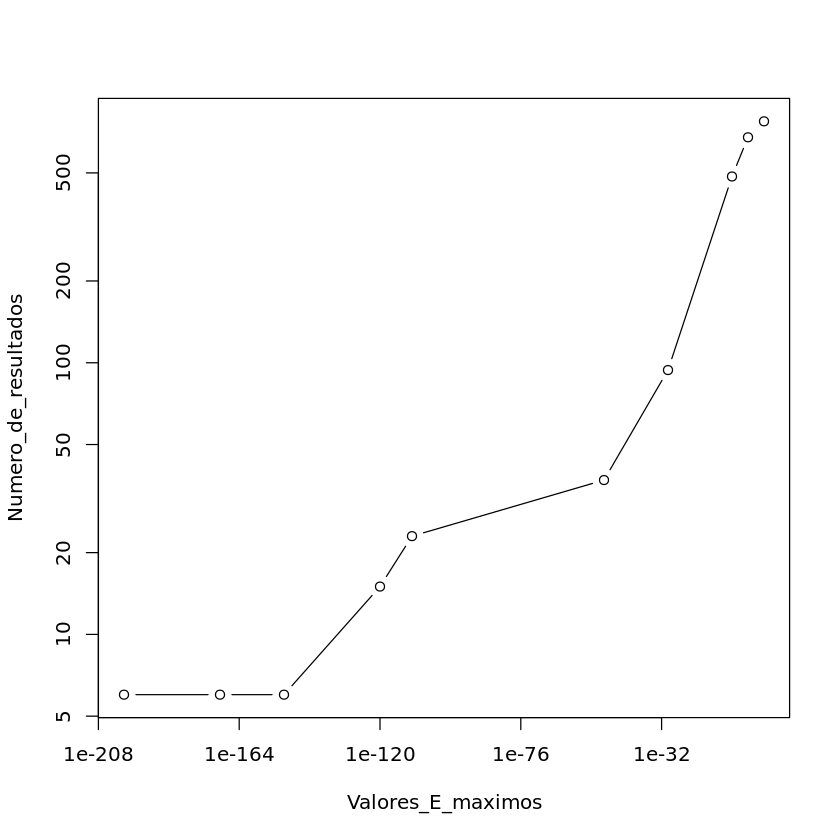

In [16]:
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

A continuación, examinamos la relación entre la **longitud del alineamiento** y el **valor *E*** de los resultados guardados en la última tabla, la número 10, en la que hemos usado un valor *E* de 1 y que contiene un mayor número de resultados.

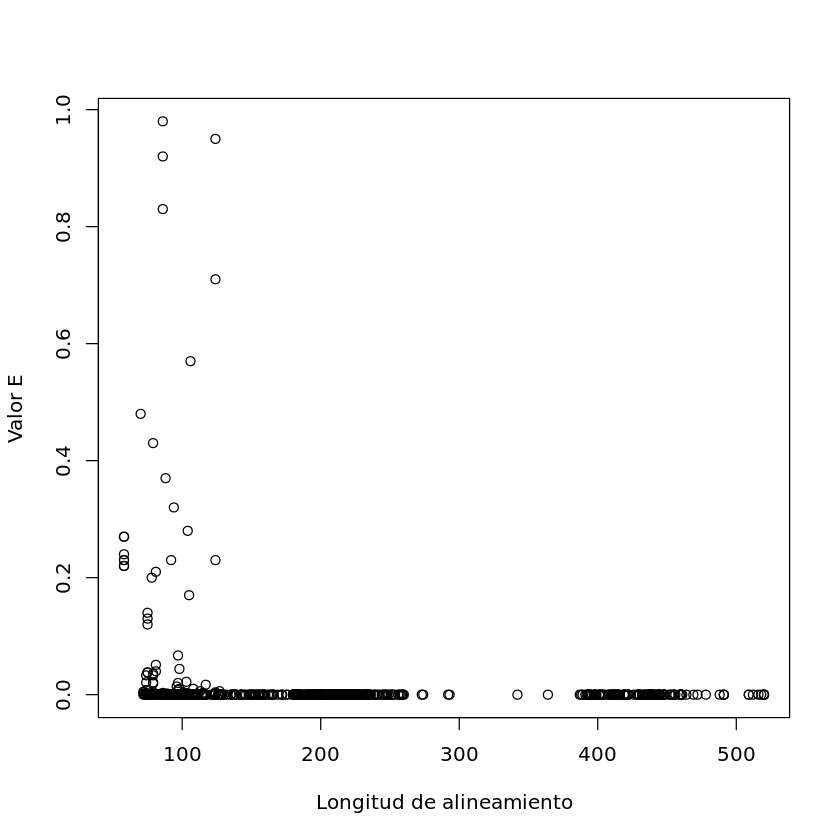

In [17]:
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

A pesar de que la proteína **CHRM1** tiene unos 500 aminoácidos, existen alineamientos con menos de 100. Esto nos muestra que hay proteínas en la base de datos *SwissProt* que tienen **homología parcial** con CHRM1. Es decir, muchos de estos alineamientos corresponden a proteínas que se parecen solo en un fragmento a nuestra proteína.

Por eso es interesante saber qué **posiciones** de nuestra proteína son las que participan en los alineamientos parciales. 

In [18]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

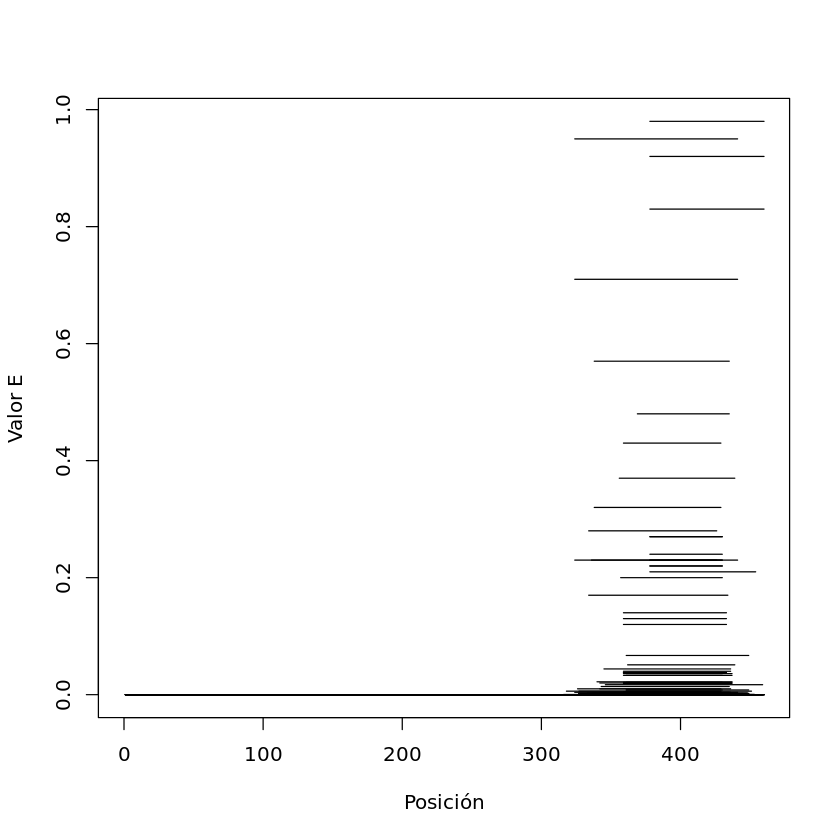

In [19]:
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

La gráfica nos muestra que la **homología de secuencias** se encuentra concentrada entre las posiciones 300 y 400.

Por último, vamos a ver la **distribución taxonómica** de las secuencias encontradas. Para ello vamos a hacer un recuento de las secuencias que se han encontrado en cada grupo taxonómico mediante la función `table()`.

In [20]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

even-toed ungulates            primates             rodents 
                  1                   3                   2 

[[2]]

even-toed ungulates            primates             rodents 
                  1                   3                   2 

[[3]]

even-toed ungulates            primates             rodents 
                  1                   3                   2 

[[4]]

              birds even-toed ungulates            primates             rodents 
                  1                   2                   6                   6 

[[5]]

              birds even-toed ungulates            primates             rodents 
                  1                   4                  10                   8 

[[6]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1 

Viendo esta tabla podemos comprobar que nuestra proteína de interés, CHRM1, está presente en diferentes grupos taxonómicos del reino *Metazoa* como primates, nematodos, cefalópodos, bivalvos, pájaros o moscas. Incluso se encuentra en virus.

Para ver la relación entre la longitud del alineamiento y la distribución taxonómica, vamos a repetir el recuento de los grupos taxonómicos contando únicamente las secuencias que tienen un alineamiento de 400 aminoácidos.

In [21]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 400
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

even-toed ungulates            primates             rodents 
                  1                   3                   2 

[[2]]

even-toed ungulates            primates             rodents 
                  1                   3                   2 

[[3]]

even-toed ungulates            primates             rodents 
                  1                   3                   2 

[[4]]

              birds even-toed ungulates            primates             rodents 
                  1                   2                   6                   6 

[[5]]

              birds even-toed ungulates            primates             rodents 
                  1                   4                  10                   8 

[[6]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1 

Después de analizar la proteína CHRM1, vamos a hacer lo mismo con la proteína **CHRNA3**.

In [22]:
Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA3.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

In [23]:
tail(Lista_de_Tablas[[4]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
54,P20420.1,45.957,470,28,496,25,432,3.26e-136,10116,Rattus norvegicus,rodents
55,Q5IS51.1,43.359,512,2,496,5,448,1.98e-135,9598,Pan troglodytes,primates
56,P04755.1,44.289,499,20,496,13,500,2.54e-135,7227,Drosophila melanogaster,flies
57,Q8SPU7.1,44.850,466,32,496,51,455,1.92e-133,9913,Bos taurus,even-toed ungulates
58,Q23022.1,42.485,499,23,497,15,484,4.37e-132,6239,Caenorhabditis elegans,nematodes
59,P09478.2,54.354,333,31,354,21,353,1.56e-128,7227,Drosophila melanogaster,flies


In [24]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]  11  16  24  59  69 118 130 183 240 263

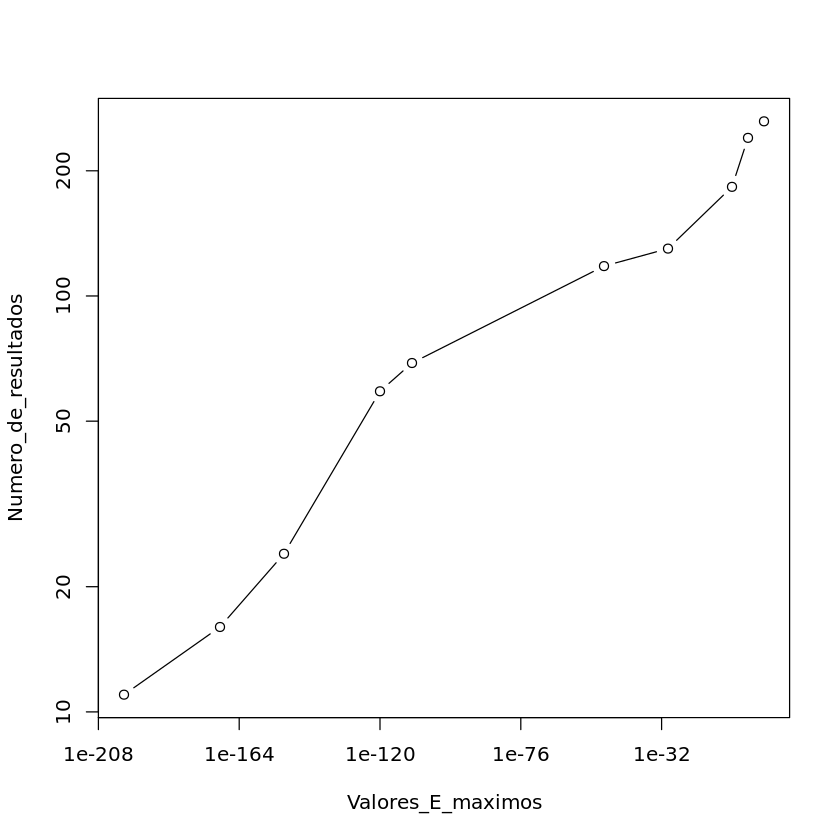

In [25]:
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

Como con la proteína **CHRM1**, vamos a examinar la relación entre la **longitud del alineamiento** y el **valor *E*** de los resultados guardados en la última tabla, la número 10, en la que he usado un valor E de 1 y que contiene un mayor número de resultados. 


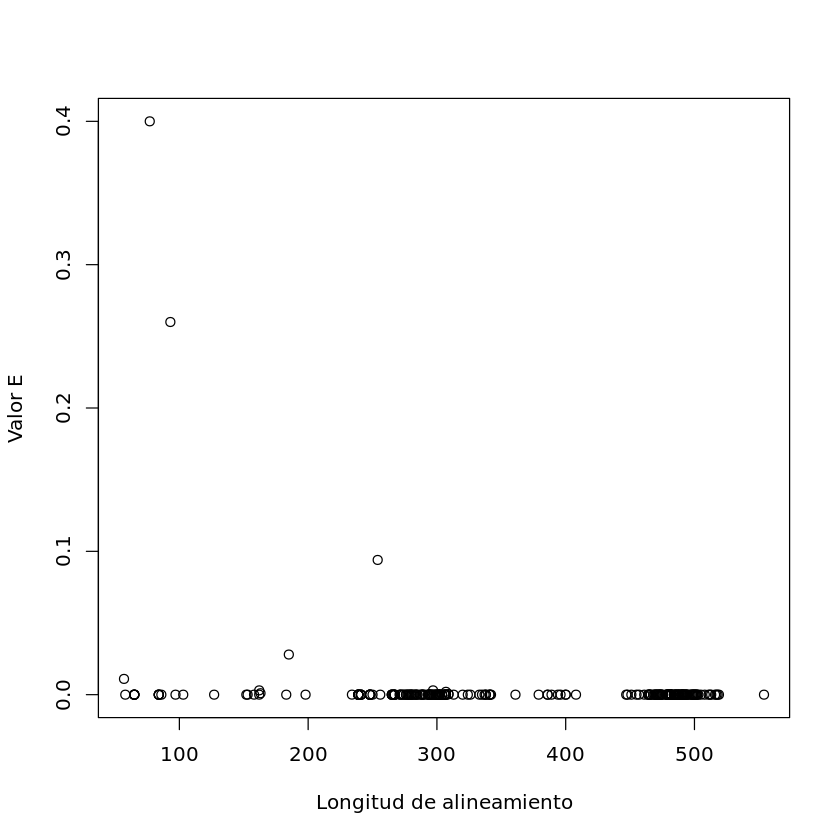

In [26]:
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

A pesar de que la proteína **CHRNA3** tiene unos 500 aminoácidos, existen alineamientos con menos de 100. Esto nos muestra lo mismo que con la proteína anterior, es decir, que hay proteínas en la base de datos *SwissProt* que tienen **homología parcial** con CHRNA3. Esto quiere decir que muchos de estos alineamientos corresponden a proteínas que se parecen solo en un fragmento a nuestra proteína.

Por eso vamos a estudiar de nuevo qué **posiciones** de nuestra proteína son las que participan en los alineamientos parciales.

In [27]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

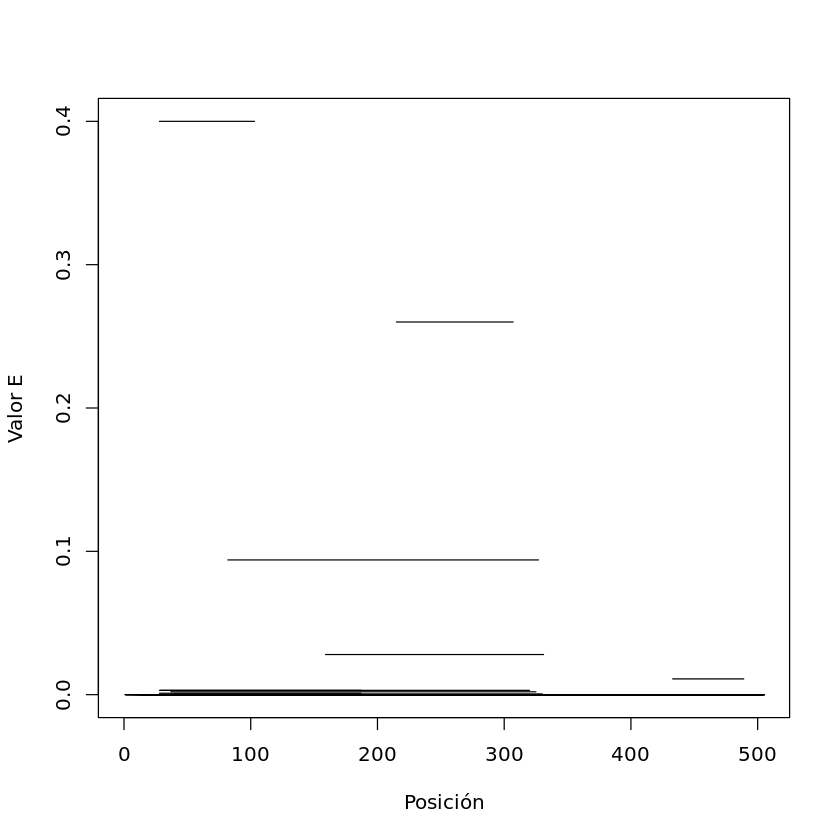

In [28]:
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

La gráfica nos muestra que la **homología de secuencias** se encuentra concentrada entre las posiciones 100 y 300.

Por último, vamos a ver la **distribución taxonómica** de las secuencias encontradas. Para ello vamos a hacer un recuento de las secuencias que se han encontrado en cada grupo taxonómico mediante la función `table()`.

In [29]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds         bony fishes even-toed ungulates            primates 
                  2                   1                   1                   3 
            rodents 
                  4 

[[2]]

              birds         bony fishes even-toed ungulates            primates 
                  3                   1                   1                   5 
            rodents 
                  6 

[[3]]

              birds         bony fishes          carnivores even-toed ungulates 
                  6                   1                   1                   1 
           primates             rodents 
                  7                   8 

[[4]]

              birds         bony fishes          carnivores even-toed ungulates 
                  9                   5                   1                   4 
              flies       frogs & toads        grasshoppers               moths 
                  3                   2                   1               

Viendo esta tabla podemos comprobar que nuestra proteína de interés, **CHRNA3**, está presente en diferentes grupos taxonómicos del reino *Metazoa* (roedores, peces óseos, insectívoros o serpientes), como la proteína CHRM1.

Para ver la relación entre la longitud del alineamiento y la distribución taxonómica, vamos a repetir el recuento de los grupos taxonómicos contando únicamente las secuencias que tienen un alineamiento de 300 aminoácidos.

In [30]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         bony fishes even-toed ungulates            primates 
                  2                   1                   1                   3 
            rodents 
                  4 

[[2]]

              birds         bony fishes even-toed ungulates            primates 
                  3                   1                   1                   5 
            rodents 
                  6 

[[3]]

              birds         bony fishes          carnivores even-toed ungulates 
                  6                   1                   1                   1 
           primates             rodents 
                  7                   8 

[[4]]

              birds         bony fishes          carnivores even-toed ungulates 
                  9                   5                   1                   4 
              flies       frogs & toads        grasshoppers               moths 
                  3                   2                   1               

Por último, repetimos todo el proceso con la proteína **CHRNA7**.

In [31]:
Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRNA7.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

In [32]:
tail(Lista_de_Tablas[[7]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
124,Q19351.5,27.557,352,1,336,1,342,9.64e-40,6239,Caenorhabditis elegans,nematodes
125,A5X5Y0.1,29.917,361,34,384,48,392,2.87e-39,9606,Homo sapiens,primates
126,Q8WXA8.2,31.077,325,21,337,45,353,5.79e-38,9606,Homo sapiens,primates
127,Q9JHJ5.1,28.990,307,28,326,30,331,7.08e-38,10090,Mus musculus,rodents
128,G5ECT0.1,29.097,299,51,337,88,384,1.57e-36,6239,Caenorhabditis elegans,nematodes
129,Q9JJ16.1,29.139,302,28,321,30,326,3.35e-36,10116,Rattus norvegicus,rodents


In [33]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]   7   7   7   9  13 120 129 160 204 265

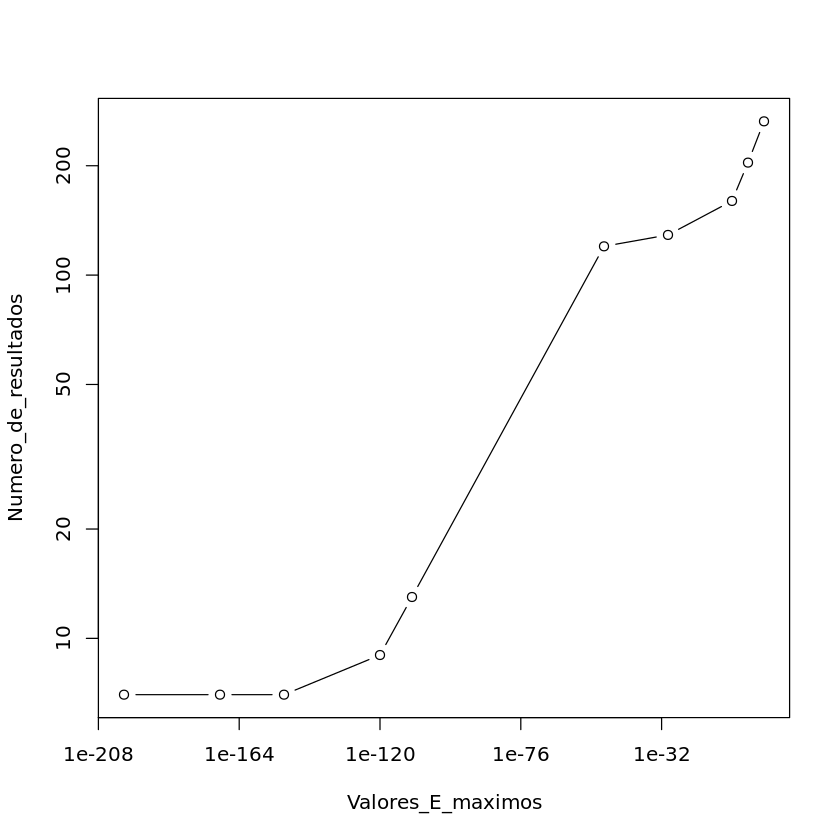

In [34]:
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

Al igual que con las proteínas anteriores, vamos a examinar la relación entre la **longitud del alineamiento** y el **valor *E*** de los resultados guardados en la última tabla, la número 10, en la que he usado un valor E de 1 y que contiene un mayor número de resultados.

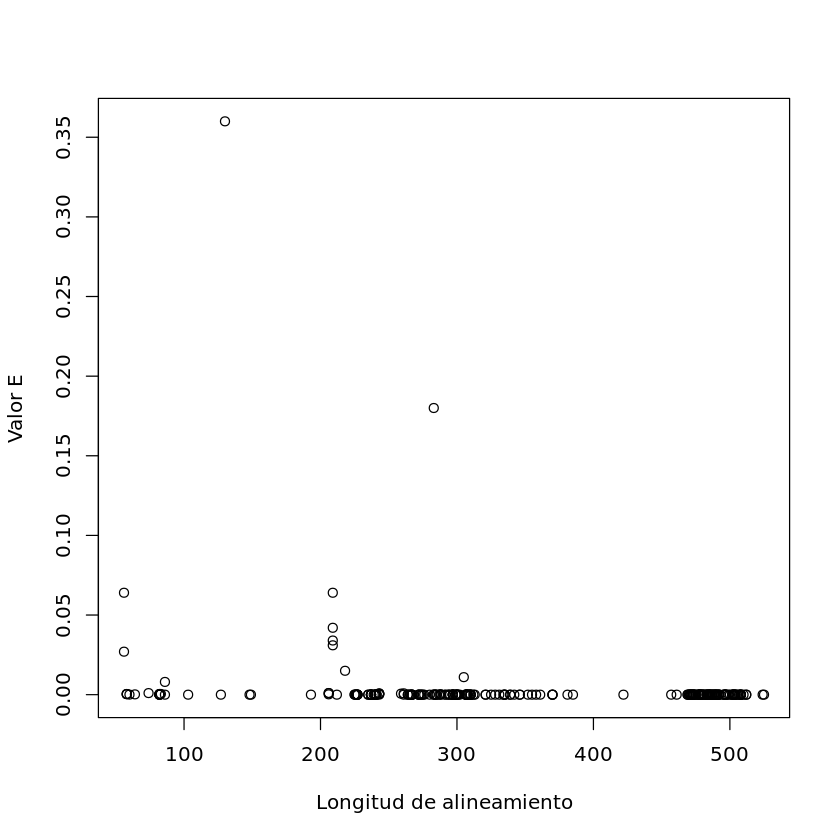

In [35]:
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

A pesar de que la proteína **CHRNA7** tiene unos 500 aminoácidos, existen alineamientos con menos de 100. En este caso volvemos a ver lo mismo que con las anteriores proteínas, que hay proteínas en la base de datos *SwissProt* que tienen **homología parcial** con CHRNA7. Muchos de estos alineamientos corresponden a proteínas que se parecen solo en un fragmento a nuestra proteína.

Igual que en los anteriores casos, vamos a analizar qué **posiciones** de nuestra proteína son las que participan en los alineamientos parciales.

In [36]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

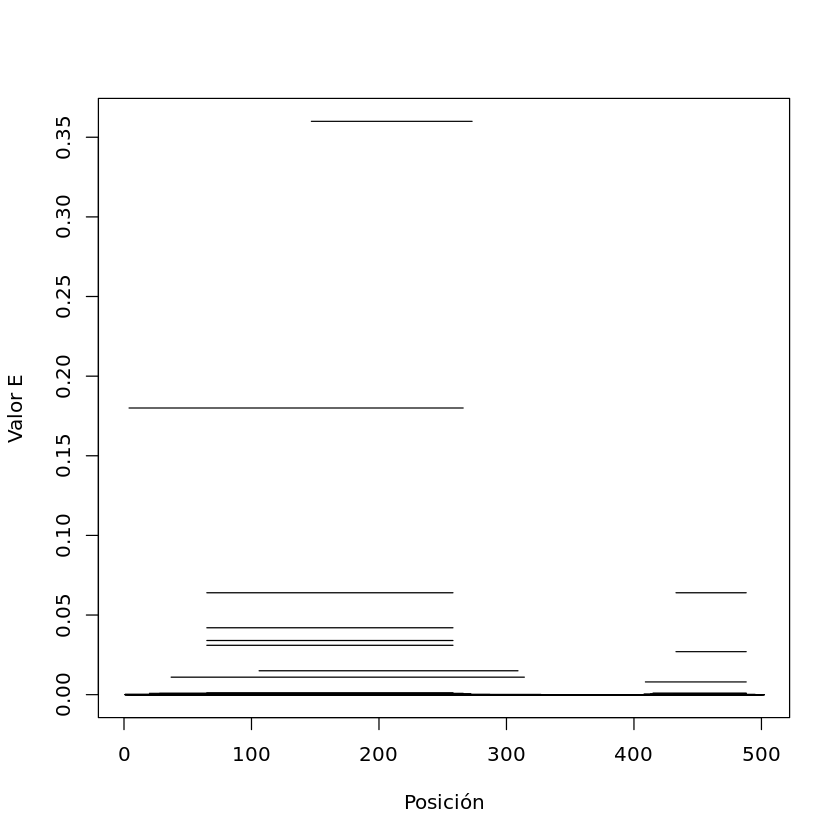

In [37]:
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

La gráfica nos muestra que la **homología de secuencias** se encuentra concentrada entre las posiciones 100 y 300, como lo que habíamos visto con la proteína CHRNA3.

Por último, vamos a hacer lo mismo que con las otras proteínas, ver la **distribución taxonómica** de las secuencias encontradas. Para ello vamos a hacer un recuento de las secuencias que se han encontrado en cada grupo taxonómico mediante la función `table()`.

In [38]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds even-toed ungulates            primates             rodents 
                  1                   1                   3                   2 

[[2]]

              birds even-toed ungulates            primates             rodents 
                  1                   1                   3                   2 

[[3]]

              birds even-toed ungulates            primates             rodents 
                  1                   1                   3                   2 

[[4]]

              birds even-toed ungulates           nematodes            primates 
                  1                   1                   2                   3 
            rodents 
                  2 

[[5]]

              birds even-toed ungulates           nematodes            primates 
                  3                   2                   2                   4 
            rodents 
                  2 

[[6]]

              birds         bony fishes          carnivores

Viendo esta tabla podemos comprobar que nuestra proteína de interés, **CHRNA7**, está presente en diferentes grupos taxonómicos del reino *Metazoa* (enterobacterias, tiburones, saltamontes o ranas) como la proteína CHRM1 y la CHRNA3.

Para ver la relación entre la longitud del alineamiento y la distribución taxonómica, vamos a repetir el recuento de los grupos taxonómicos contando únicamente las secuencias que tienen un alineamiento de 300 aminoácidos.

In [39]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds even-toed ungulates            primates             rodents 
                  1                   1                   3                   2 

[[2]]

              birds even-toed ungulates            primates             rodents 
                  1                   1                   3                   2 

[[3]]

              birds even-toed ungulates            primates             rodents 
                  1                   1                   3                   2 

[[4]]

              birds even-toed ungulates           nematodes            primates 
                  1                   1                   2                   3 
            rodents 
                  2 

[[5]]

              birds even-toed ungulates           nematodes            primates 
                  3                   2                   2                   4 
            rodents 
                  2 

[[6]]

              birds         bony fishes          carnivores

A parte del **blastp**, podemos buscar y comparar secuencias homólogas mediante un **PSI-BLAST**. Este algoritmo se caracteriza por partir de una matriz de puntuación (***PSSM***) que ha sustituido a la matriz **BLOSUM62**. Gracias a esto conseguimos que la búsqueda sea más rápida, sencilla, eficiente y sensible.

Para ello ejecutamos el **PSI-BLAST** que nos generará un archivo **html** el cual podemos visualizar.

Con la finalidad de ver esto vamos a usar la proteína humana **CHRM1**.

In [40]:
system2(command = 'psiblast',
        args = c('-db', 'swissprot',
                 '-query', 'CHRM1.fas',
                 '-out', 'psi.html',
                 '-evalue', '0.005',
                 '-inclusion_ethresh', '0.001',
                 '-num_iterations', '0',
                 '-html'),
        wait = TRUE,
        stdout = TRUE)

character(0)

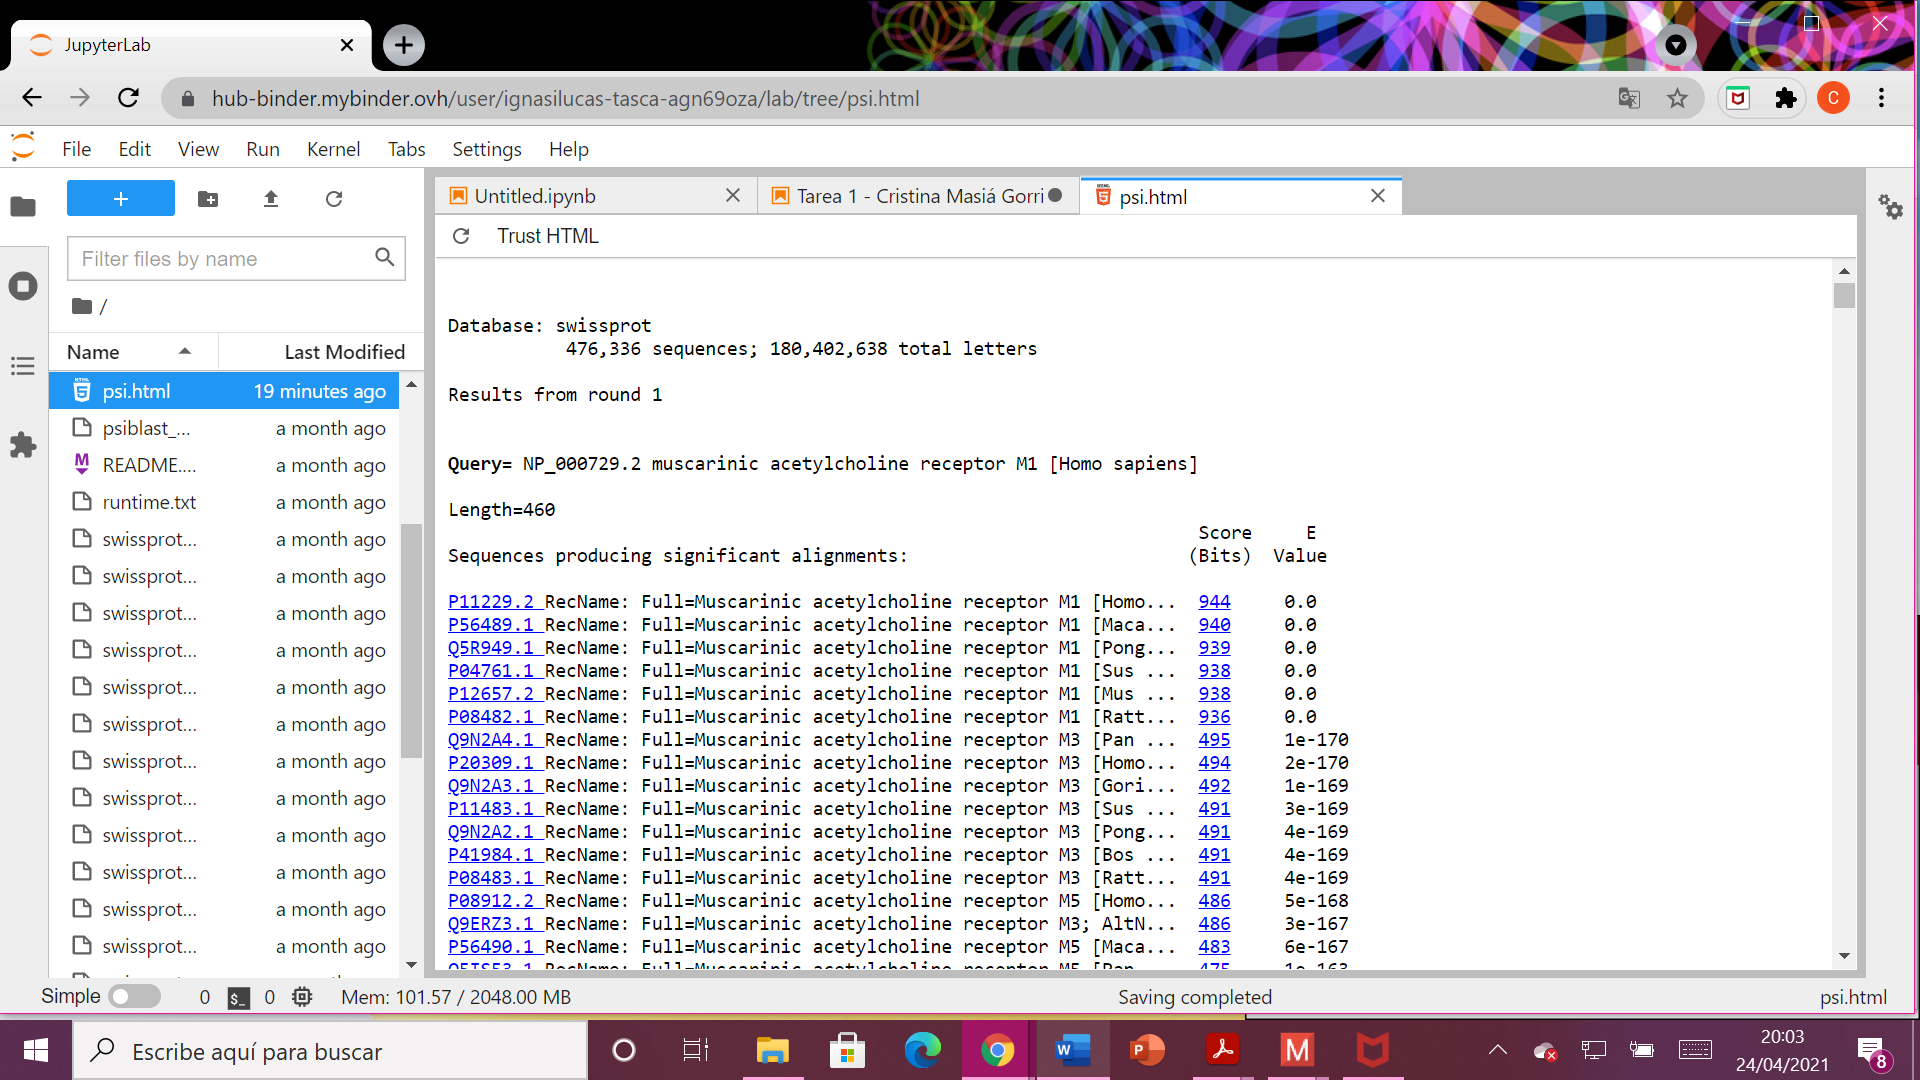

Podemos ver que el PSI-BLAST, al igual que el blastp, utiliza la misma base de datos (*SwissProt*).

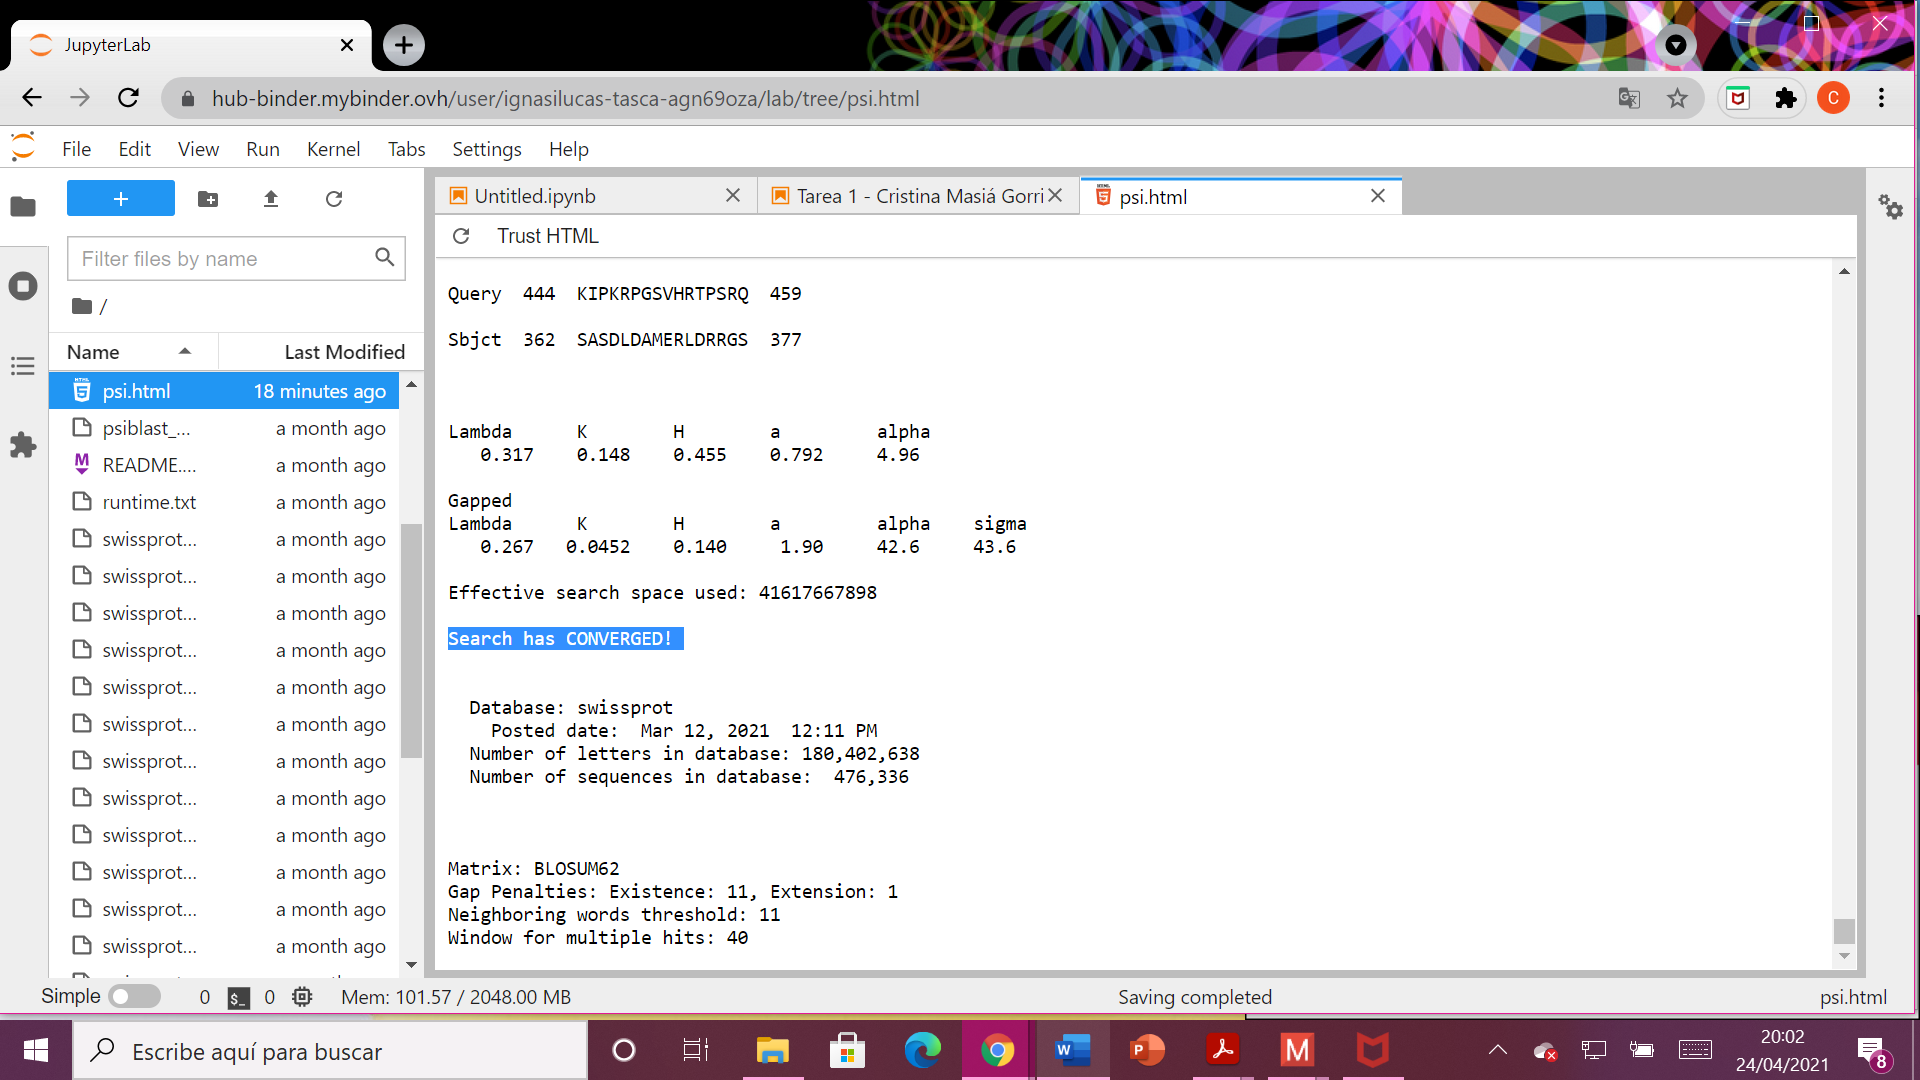

Tras 19 rondas de búsqueda el PSI-BLAST **ha convergido**. Esto significa que ha encontrado grupos taxonómicos que tienen una secuencia de proteína homóloga a la nuestra.

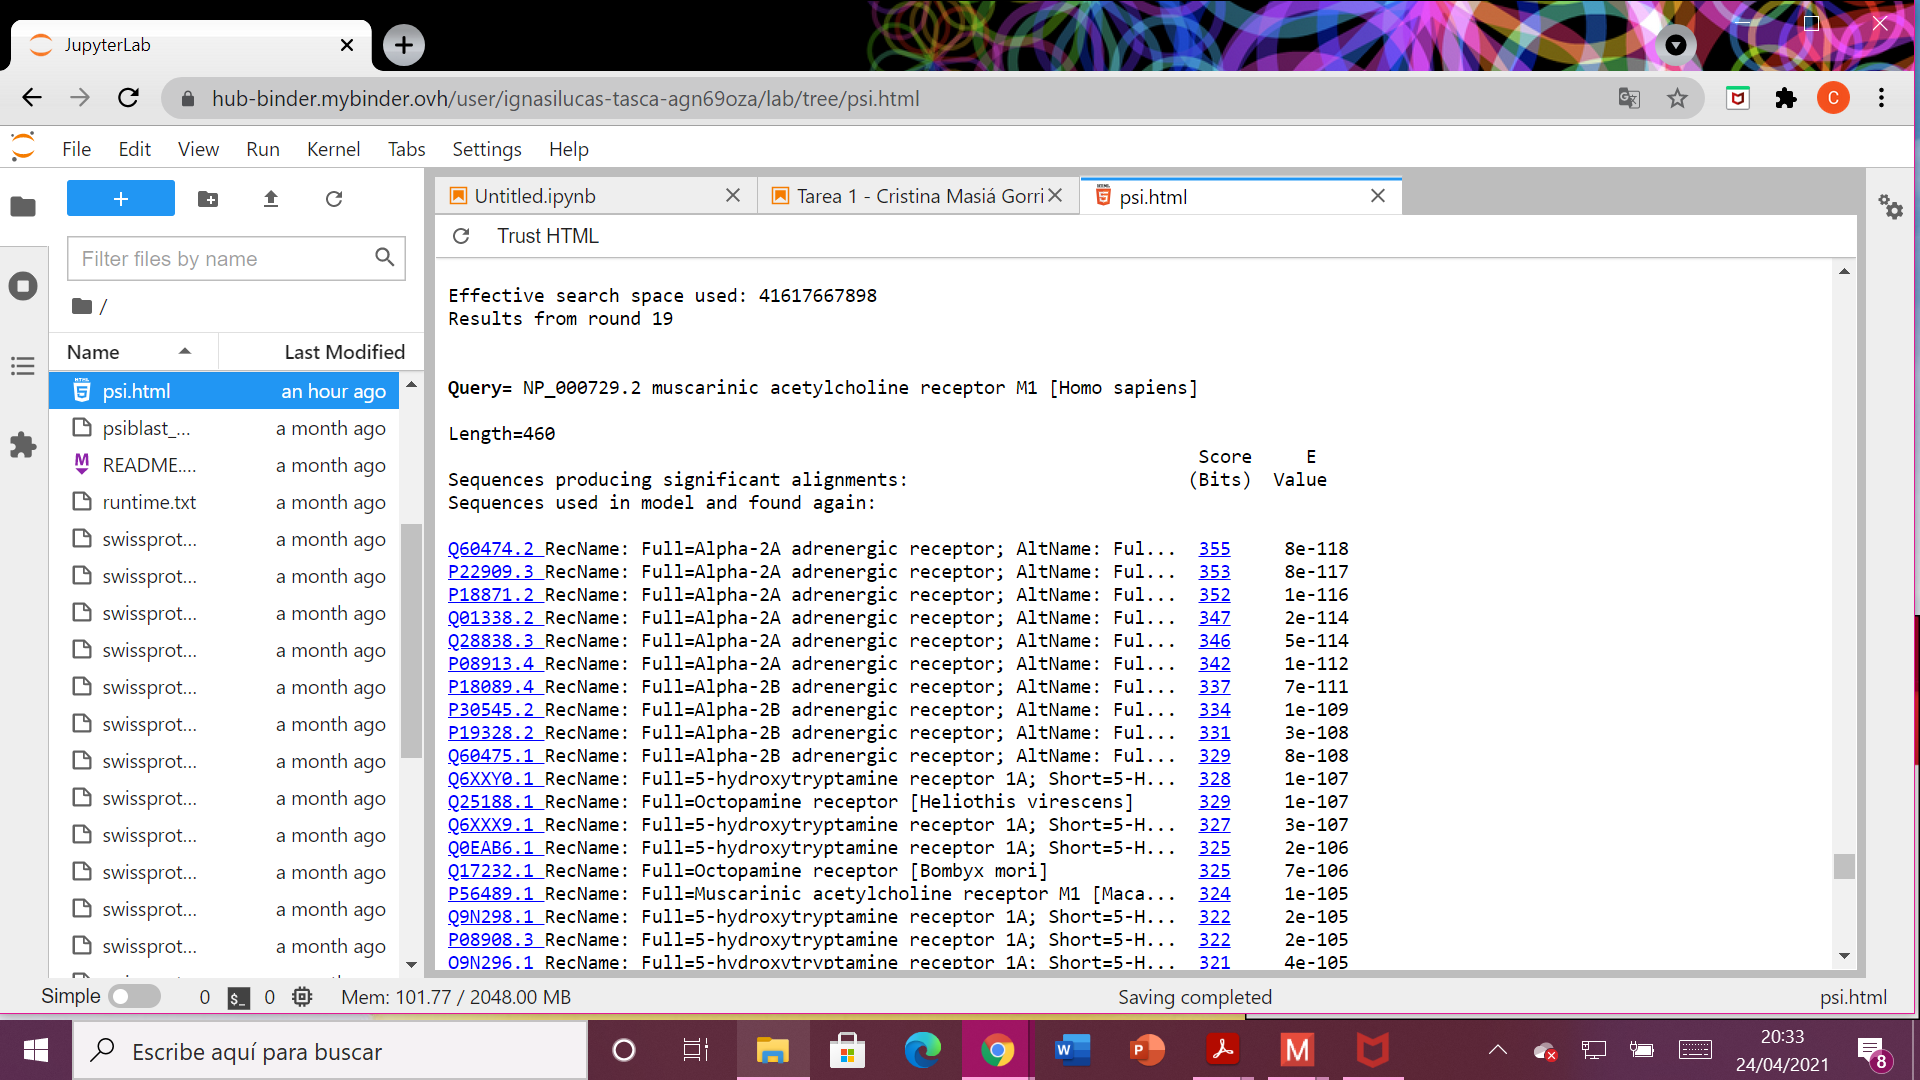

Entre las distintas secuencias que ha encontrado hay receptores adrenérgicos alfa y beta, de dopamina, de acetilcolina muscarínicos, de hidroxitriptamina o de somatostatina y secuencias de rodopsina o melanopsina.

## Discusión

Para este análisis hemos usado la secuencia de la proteína humana **CHRM1** y de las proteínas **CHRNA3** y **CHRNA7**, que participan en neuroreceptores de acetilcolina, como búsquedas de **blastp**. Hemos visto que hay multitud de homologías en otras especies que alcanzan a gran parte del reino *Metazoa*.

Como ya sabemos por Viscardi *et al.* (2021), estas proteínas aparecieron en el último ancestro común de Cnidarios y Ctenóforos. Esto explicaría el hecho de que haya proteínas homólogas en tantos grupos taxonómicos y tan diversos.

Por otra parte, hemos visto que la distribución de los alineamientos se limitan a regiones de 100-200 aminoácidos, entre los 300-400 aminoácidos para CHRM1 y 100-300 para las otras dos proteínas (CHRNA3 y CHRNA7). Estas regiones constituyen un dominio conservado.

Gracias al **blastp** hemos podido confirmar lo que decían los autores en su artículo ya que se ha visto qué grupos taxonómicos muestran homología de secuencia con nuestras proteínas. Esto demuestra la importancia de utilizar este tipo de algoritmos ya que nos permiten comparar secuencias de una forma fácil y sencilla, consiguiendo optimizar el trabajo.

Del mismo modo, no solo podemos usar este algoritmo, existen muchos otros que nos pueden ayudar a encontrar la respuesta a nuestra pregunta. Es el caso del **PSI-BLAST**. Este algoritmo es mejor que el **blastp** ya que es más sensible y rápido, entre otras cosas, como ya hemos podido ver. A parte de este algoritmo también podríamos usar el `rpsblast` que nos ahorra un paso más.

Con todo esto podemos decir que, hoy en día, tenemos a nuestra disposición muchos programas y algoritmos que nos permiten procesar los datos y trabajar con ellos de una forma rápida, algo que se agradece en el campo de la ciencia, donde parece siempre que se avanza lentamente.

## Bibliografía

Viscardi, L. H., Imparato, D. O., Bortolini, M. C., & Dalmolin, R. (2021). Ionotropic Receptors as a Driving Force behind Human Synapse Establishment. *Molecular biology and evolution*, 38(3), 735–744. https://doi.org/10.1093/molbev/msaa252

Fagerberg, L., Hallström, B. M., Oksvold, P., Kampf, C., Djureinovic, D., Odeberg, J., Habuka, M., Tahmasebpoor, S., Danielsson, A., Edlund, K., Asplund, A., Sjöstedt, E., Lundberg, E., Szigyarto, C. A., Skogs, M., Takanen, J. O., Berling, H., Tegel, H., Mulder, J., Nilsson, P., … Uhlén, M. (2014). Analysis of the human tissue-specific expression by genome-wide integration of transcriptomics and antibody-based proteomics. *Molecular & cellular proteomics : MCP*, 13(2), 397–406. https://doi.org/10.1074/mcp.M113.035600

Altschul, S. F., Gish, W., Miller, W., Myers, E. W., & Lipman, D. J. (1990). Basic local alignment search tool. *Journal of molecular biology*, 215(3), 403–410. https://doi.org/10.1016/S0022-2836(05)80360-2

Altschul, S. F., Madden, T. L., Schäffer, A. A., Zhang, J., Zhang, Z., Miller, W., & Lipman, D. J. (1997). Gapped BLAST and PSI-BLAST: a new generation of protein database search programs. *Nucleic acids research*, 25(17), 3389–3402. https://doi.org/10.1093/nar/25.17.3389